# Neurotransmitter analysis for the pre-synaptic inputs to "both" oviINr and oviIN_l

1. import the preprocessed inputs file from oviIN_combined file
2. import the oviIN_synapse file for the locations
3. merge those two dataframes
4. import the ovi_inputs neurotransmitter data and merge onto larger dataframe
5. create color map so that excitatory vs inhibitory neurotransmitters are different colors
6. create skeleton and plot

This process is then repeated for the outputs but all the code was put into one function

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import bokeh
import bokeh.palettes
from bokeh.plotting import figure, output_notebook, show, output_file
from bokeh.io import export_svg, export_png
from bokeh.models import Legend, LegendItem
import os
from neuprint import Client


auth_token_file = open("/Users/rw2822/Documents/Github/flybrain-clustering/flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:v1.2.1', token=auth_token)
except:
    np_client = None

output_notebook()

Loading BokehJS ...

## Inputs

In [6]:
# Create skeleton for later usage (inspired from Prof G.'s notebook ovi_specs_sandbox.ipynb)
# body Ids of oviINs
ovi_r = 423101189
ovi_l = 485934965

ovis = [ovi_r, ovi_l]
# cretae skeleton for both oviINs
skeletons = []

for i in ovis:
    s = np_client.fetch_skeleton(i, format='pandas')
    s['bodyId'] = i
    s['color'] = bokeh.palettes.Greys[3][1]
    skeletons.append(s)

skeletons = pd.concat(skeletons, ignore_index=True)

# Join parent nodes
segments = skeletons.merge(skeletons, left_on=['bodyId', 'link'], right_on=['bodyId', 'rowId'], suffixes=['_child', '_parent'])



In [8]:
# import preprocessed inputs file
ovi_HB_node_df  = pd.read_csv('/Users/rw2822/Documents/Github/flybrain-clustering/oviIN_combined/preprocessed_inputs-v1.2.1/preprocessed_nodes.csv')

In [9]:
# Refine the dataframe to only include modules, celltype and id
celltype_df = ovi_HB_node_df[['id', '0.0', '0.1', '0.25', '0.5', '0.75', 'celltype']].copy()
celltype_df

id  0.0  0.1  0.25  0.5  0.75 celltype
0     1003215282    1    1     1    1     1    CL229
1     1005952640    2    2     2    2     2    IB058
2     1006928515    1    1     3    3     3    CL300
3     1007260806    1    1     3    4     4    CL301
4     1007644534    1    1     1    5     5     None
...          ...  ...  ...   ...  ...   ...      ...
3738   988567837    2    5    14   82    86     FB4G
3739   988653659    2  238   431  636  1235     None
3740   988654188    5  288   185  287   375     None
3741   988909130    2    5    14  645    90     FB5V
3742   989228019    2    5    14  645    90     FB5V

[3743 rows x 7 columns]

In [10]:
# Import synapse location data
ovi_pre_syns = pd.read_csv('/Users/rw2822/Documents/Github/flybrain-clustering/ovi_pre_syns.csv', index_col=0)
ovi_pre_syns

bodyId_pre  bodyId_post roi_pre roi_post  x_pre  y_pre  z_pre  x_post  \
0       989228019    423101189  CRE(R)   CRE(R)  22857  34611  17485   22825   
1       988909130    423101189  CRE(R)   CRE(R)  19523  31096  21707   19509   
2       988567837    423101189  LAL(R)   LAL(R)  23100  27659  23824   23074   
3       987842109    423101189  SMP(R)   SMP(R)  19041  33090  14598   19047   
4       987273073    423101189  CRE(R)   CRE(R)  19347  27826  15348   19351   
...           ...          ...     ...      ...    ...    ...    ...     ...   
21619  1006928515    423101189      IB       IB  22664  14840  19749   22651   
21620  1005952640    423101189      IB       IB  21998  15625  18990   22007   
21621  1005952640    423101189      IB       IB  22998  15275  23049   23014   
21622  1005952640    423101189      IB       IB  23034  15380  23131   23048   
21623  1003215282    423101189      IB       IB  24301  16887  21862   24282   

       y_post  z_post  confidence_pre  confidence_post type_pre  type_post  
0       34624   17464           0.998         0.633171     FB5V        NaN  
1       31112   21693           0.969         0.528840     FB5V        NaN  
2       27659   23801           0.970         0.459446     FB4G        NaN  
3       33072   14598           0.973         0.974019      NaN        NaN  
4       27806   15376           0.943         0.595921      NaN        NaN  
...       ...     ...             ...              ...      ...        ...  
21619   14823   19757           0.994         0.865103    CL300        NaN  
21620   15603   18991           0.996         0.929040    IB058        NaN  
21621   15272   23060           0.835         0.780000    IB058        NaN  
21622   15364   23146           0.986         0.905853    IB058        NaN  
21623   16879   21874           0.993         0.868024    CL229        NaN  

[21624 rows x 14 columns]

In [11]:
# Merge to create larger dataframe
ovi_pre_locs = ovi_pre_syns.merge(celltype_df, how = 'inner', left_on='bodyId_pre', right_on='id')
ovi_pre_locs

bodyId_pre  bodyId_post roi_pre roi_post  x_pre  y_pre  z_pre  x_post  \
0       989228019    423101189  CRE(R)   CRE(R)  22857  34611  17485   22825   
1       988909130    423101189  CRE(R)   CRE(R)  19523  31096  21707   19509   
2       988567837    423101189  LAL(R)   LAL(R)  23100  27659  23824   23074   
3       987842109    423101189  SMP(R)   SMP(R)  19041  33090  14598   19047   
4       987273073    423101189  CRE(R)   CRE(R)  19347  27826  15348   19351   
...           ...          ...     ...      ...    ...    ...    ...     ...   
21619  1006928515    423101189      IB       IB  22664  14840  19749   22651   
21620  1005952640    423101189      IB       IB  21998  15625  18990   22007   
21621  1005952640    423101189      IB       IB  22998  15275  23049   23014   
21622  1005952640    423101189      IB       IB  23034  15380  23131   23048   
21623  1003215282    423101189      IB       IB  24301  16887  21862   24282   

       y_post  z_post  ...  confidence_post  type_pre type_post          id  \
0       34624   17464  ...         0.633171      FB5V       NaN   989228019   
1       31112   21693  ...         0.528840      FB5V       NaN   988909130   
2       27659   23801  ...         0.459446      FB4G       NaN   988567837   
3       33072   14598  ...         0.974019       NaN       NaN   987842109   
4       27806   15376  ...         0.595921       NaN       NaN   987273073   
...       ...     ...  ...              ...       ...       ...         ...   
21619   14823   19757  ...         0.865103     CL300       NaN  1006928515   
21620   15603   18991  ...         0.929040     IB058       NaN  1005952640   
21621   15272   23060  ...         0.780000     IB058       NaN  1005952640   
21622   15364   23146  ...         0.905853     IB058       NaN  1005952640   
21623   16879   21874  ...         0.868024     CL229       NaN  1003215282   

       0.0  0.1  0.25  0.5  0.75  celltype  
0        2    5    14  645    90      FB5V  
1        2    5    14  645    90      FB5V  
2        2    5    14   82    86      FB4G  
3        4  297   524  877  1232      None  
4        4   19    28   36   909      None  
...    ...  ...   ...  ...   ...       ...  
21619    1    1     3    3     3     CL300  
21620    2    2     2    2     2     IB058  
21621    2    2     2    2     2     IB058  
21622    2    2     2    2     2     IB058  
21623    1    1     1    1     1     CL229  

[21624 rows x 21 columns]

In [12]:
# import neurotransmitter info
ovi_nt_info = pd.read_csv('/Users/rw2822/Documents/Github/flybrain-clustering/ovi_input_types.csv')
ovi_nt_info_refined = ovi_nt_info[['type_pre', 'neurotransmitter']].copy()
ovi_nt_info_refined

type_pre neurotransmitter
0          FS1A              ACH
1        SMP052              ACH
2         IB017              ACH
3        SMP176              ACH
4        SMP383              ACH
...         ...              ...
1044     SMP216              NaN
1045     CRE088              NaN
1046  LHAV9a1_c              NaN
1047     SMP038             GLUT
1048     SIP034             GLUT

[1049 rows x 2 columns]

In [13]:
# merge to create complete dataframe, ready for plotting
ovi_r_comp = ovi_pre_locs.merge(ovi_nt_info_refined, left_on='type_pre', right_on='type_pre')
ovi_r_comp = ovi_r_comp.fillna('Unknown')
ovi_r_comp

bodyId_pre  bodyId_post roi_pre roi_post  x_pre  y_pre  z_pre  x_post  \
0       989228019    423101189  CRE(R)   CRE(R)  22857  34611  17485   22825   
1       988909130    423101189  CRE(R)   CRE(R)  19523  31096  21707   19509   
2       926490072    423101189  CRE(R)   CRE(R)  21622  35481  20533   21614   
3       926490072    423101189  CRE(R)   CRE(R)  20720  35019  20150   20710   
4       926490072    423101189  CRE(R)   CRE(R)  20697  35105  20224   20677   
...           ...          ...     ...      ...    ...    ...    ...     ...   
17209  1008024276    423101189  CRE(R)   CRE(R)  22722  34402  18357   22727   
17210  1005952640    423101189      IB       IB  21998  15625  18990   22007   
17211  1005952640    423101189      IB       IB  22998  15275  23049   23014   
17212  1005952640    423101189      IB       IB  23034  15380  23131   23048   
17213  1003215282    423101189      IB       IB  24301  16887  21862   24282   

       y_post  z_post  ...  type_pre  type_post          id 0.0  0.1  0.25  \
0       34624   17464  ...      FB5V    Unknown   989228019   2    5    14   
1       31112   21693  ...      FB5V    Unknown   988909130   2    5    14   
2       35460   20539  ...      FB5V    Unknown   926490072   2    5    14   
3       35020   20127  ...      FB5V    Unknown   926490072   2    5    14   
4       35093   20229  ...      FB5V    Unknown   926490072   2    5    14   
...       ...     ...  ...       ...        ...         ...  ..  ...   ...   
17209   34375   18371  ...      FB5N    Unknown  1008024276   3    3     4   
17210   15603   18991  ...     IB058    Unknown  1005952640   2    2     2   
17211   15272   23060  ...     IB058    Unknown  1005952640   2    2     2   
17212   15364   23146  ...     IB058    Unknown  1005952640   2    2     2   
17213   16879   21874  ...     CL229    Unknown  1003215282   1    1     1   

       0.5  0.75  celltype  neurotransmitter  
0      645    90      FB5V              GLUT  
1      645    90      FB5V              GLUT  
2      645    90      FB5V              GLUT  
3      645    90      FB5V              GLUT  
4      645    90      FB5V              GLUT  
...    ...   ...       ...               ...  
17209    6     6      FB5N              GLUT  
17210    2     2     IB058              GLUT  
17211    2     2     IB058              GLUT  
17212    2     2     IB058              GLUT  
17213    1     1     CL229           Unknown  

[17214 rows x 22 columns]

In [22]:
ovi_ex = ovi_r_comp.copy()
ovi_in = ovi_r_comp.copy()

In [25]:
# create colormap for plotting
# This will be 5 colors for excitatory, inhibitory, both, oct, and unknown
colormap_in = {'GABA': 'blue',
            'GABA (L)': 'blue',
            'SER': 'blue',
            'SER (R)': 'blue',
            'SER (L) DA (R)': 'blue',
            'DA': 'blue',
            'DA (L)': 'blue',
            'DA (R)': 'blue',
            'DA, SER(L)': 'blue'}

colormap_ex = {'GLUT': 'red',
                'GLUT (L)': 'red',
                'GLUT (R)': 'red',
            'ACH': 'red', 
            'ACH*': 'red', 
            'ACH left': 'red', 
            'ACH, GLUT': 'red',
            'NE': 'red', 
            'GLUT (R) ACH (L)': 'red', 
            'GLUT (L) ACH (R)': 'red', 
            'GLUT (R) GLUT (L) ACH (R)': 'red',
            'GLUT (L) ACH (L) GLUT (R) ACH (R)': 'red',
            'OCT':'red',
            'OCT (C)':'red'
        }
colormap_in # check colormap

{'GABA': 'blue',
 'GABA (L)': 'blue',
 'SER': 'blue',
 'SER (R)': 'blue',
 'SER (L) DA (R)': 'blue',
 'DA': 'blue',
 'DA (L)': 'blue',
 'DA (R)': 'blue',
 'DA, SER(L)': 'blue'}

In [26]:
# Add colormap info to dataframe
ovi_in['color'] = ovi_in['neurotransmitter'].map(colormap_in)
ovi_ex['color'] = ovi_ex['neurotransmitter'].map(colormap_ex)
ovi_in

bodyId_pre  bodyId_post roi_pre roi_post  x_pre  y_pre  z_pre  x_post  \
0       989228019    423101189  CRE(R)   CRE(R)  22857  34611  17485   22825   
1       988909130    423101189  CRE(R)   CRE(R)  19523  31096  21707   19509   
2       926490072    423101189  CRE(R)   CRE(R)  21622  35481  20533   21614   
3       926490072    423101189  CRE(R)   CRE(R)  20720  35019  20150   20710   
4       926490072    423101189  CRE(R)   CRE(R)  20697  35105  20224   20677   
...           ...          ...     ...      ...    ...    ...    ...     ...   
17209  1008024276    423101189  CRE(R)   CRE(R)  22722  34402  18357   22727   
17210  1005952640    423101189      IB       IB  21998  15625  18990   22007   
17211  1005952640    423101189      IB       IB  22998  15275  23049   23014   
17212  1005952640    423101189      IB       IB  23034  15380  23131   23048   
17213  1003215282    423101189      IB       IB  24301  16887  21862   24282   

       y_post  z_post  ...  type_post          id 0.0 0.1  0.25  0.5  0.75  \
0       34624   17464  ...    Unknown   989228019   2   5    14  645    90   
1       31112   21693  ...    Unknown   988909130   2   5    14  645    90   
2       35460   20539  ...    Unknown   926490072   2   5    14  645    90   
3       35020   20127  ...    Unknown   926490072   2   5    14  645    90   
4       35093   20229  ...    Unknown   926490072   2   5    14  645    90   
...       ...     ...  ...        ...         ...  ..  ..   ...  ...   ...   
17209   34375   18371  ...    Unknown  1008024276   3   3     4    6     6   
17210   15603   18991  ...    Unknown  1005952640   2   2     2    2     2   
17211   15272   23060  ...    Unknown  1005952640   2   2     2    2     2   
17212   15364   23146  ...    Unknown  1005952640   2   2     2    2     2   
17213   16879   21874  ...    Unknown  1003215282   1   1     1    1     1   

       celltype  neurotransmitter  color  
0          FB5V              GLUT    NaN  
1          FB5V              GLUT    NaN  
2          FB5V              GLUT    NaN  
3          FB5V              GLUT    NaN  
4          FB5V              GLUT    NaN  
...         ...               ...    ...  
17209      FB5N              GLUT    NaN  
17210     IB058              GLUT    NaN  
17211     IB058              GLUT    NaN  
17212     IB058              GLUT    NaN  
17213     CL229           Unknown    NaN  

[17214 rows x 23 columns]

In [16]:
# Dividing dataframe into neurotransmitter types (color) for plotting
ovi_red = ovi_r_comp[ovi_r_comp['color']=='red']
ovi_blue = ovi_r_comp[ovi_r_comp['color']=='blue']
ovi_green = ovi_r_comp[ovi_r_comp['color']=='green']
ovi_black = ovi_r_comp[ovi_r_comp['color']=='black']
ovi_pink = ovi_r_comp[ovi_r_comp['color']=='pink']

In [18]:
ovi_blue

bodyId_pre  bodyId_post roi_pre roi_post  x_pre  y_pre  z_pre  x_post  \
31      984536209    423101189  LAL(R)   LAL(R)  18810  29152  23916   18810   
32      984536209    423101189  LAL(R)   LAL(R)  19099  27311  21457   19086   
33      984536209    423101189  LAL(R)   LAL(R)  19173  27278  21498   19195   
34      984536209    423101189  CRE(R)   CRE(R)  21899  35424  15535   21907   
35      984536209    423101189  LAL(R)   LAL(R)  20249  30067  23201   20260   
...           ...          ...     ...      ...    ...    ...    ...     ...   
17153  1072063538    423101189  SPS(R)   SPS(R)  24203  16503  25725   24180   
17154  1072063538    423101189  SMP(R)   SMP(R)  21182  21079  12603   21201   
17155  1072063538    423101189  SMP(R)   SMP(R)  22299  20339  10613   22302   
17156  1072063538    423101189  SMP(R)   SMP(R)  22465  21533  11669   22483   
17204  1036987921    423101189  SIP(R)   SIP(R)  16005  27911  15302   16002   

       y_post  z_post  ...  type_post          id 0.0 0.1  0.25  0.5  0.75  \
31      29126   23916  ...    Unknown   984536209   2   5    14  514   649   
32      27293   21459  ...    Unknown   984536209   2   5    14  514   649   
33      27262   21487  ...    Unknown   984536209   2   5    14  514   649   
34      35430   15519  ...    Unknown   984536209   2   5    14  514   649   
35      30068   23226  ...    Unknown   984536209   2   5    14  514   649   
...       ...     ...  ...        ...         ...  ..  ..   ...  ...   ...   
17153   16506   25723  ...    Unknown  1072063538   1   7    66   92   105   
17154   21084   12615  ...    Unknown  1072063538   1   7    66   92   105   
17155   20321   10616  ...    Unknown  1072063538   1   7    66   92   105   
17156   21526   11661  ...    Unknown  1072063538   1   7    66   92   105   
17204   27905   15315  ...    Unknown  1036987921   1   2     2   55    58   

       celltype  neurotransmitter  color  
31       LAL100              GABA   blue  
32       LAL100              GABA   blue  
33       LAL100              GABA   blue  
34       LAL100              GABA   blue  
35       LAL100              GABA   blue  
...         ...               ...    ...  
17153     DNp27               SER   blue  
17154     DNp27               SER   blue  
17155     DNp27               SER   blue  
17156     DNp27               SER   blue  
17204    ATL042                DA   blue  

[1189 rows x 23 columns]

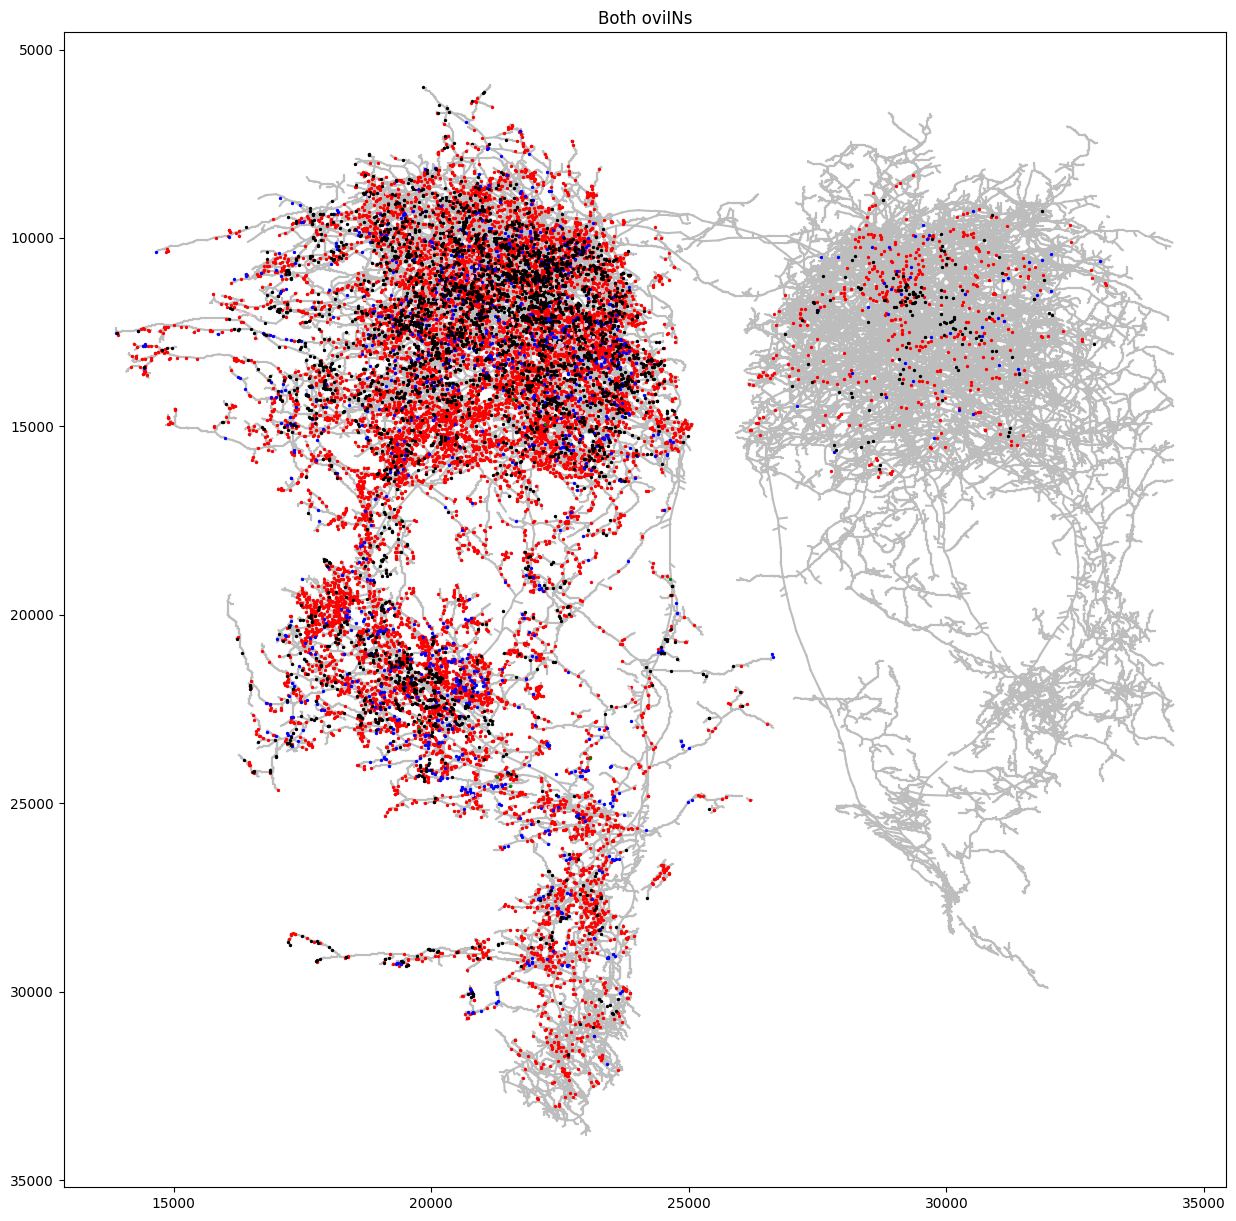

In [38]:
# Plotting the skeleton and then the color coded synapses
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Both oviINs')
ax.invert_yaxis()  # Flip the y-axis

# Plot the skeleton (2D)
for index, row in segments.iterrows():
    ax.plot([row['x_child'], row['x_parent']], [row['z_child'], row['z_parent']], color=row['color_child'], zorder=1)

ax.scatter(ovi_red['x_post'], ovi_red['z_post'], color='red', s=2, zorder=10)
ax.scatter(ovi_blue['x_post'], ovi_blue['z_post'], color='blue', s=2, zorder=10)
ax.scatter(ovi_green['x_post'], ovi_green['z_post'], color='green', s=2, zorder=10)
ax.scatter(ovi_black['x_post'], ovi_black['z_post'], color='black', s=2, zorder=10)
ax.scatter(ovi_pink['x_post'], ovi_pink['z_post'], color='pink', s=2, zorder=10)

plt.show()

In [27]:
ovi_red = ovi_ex[ovi_ex['color']=='red']
ovi_blue = ovi_in[ovi_in['color']=='blue']

In [28]:
## Function that plots each cluster by its neurotransmitter type (2 x 3)
def cluster_nt(df, cluster_list):
    fig, ax = plt.subplots(2,3,figsize=(18, 15))
    for i, cluster in enumerate(cluster_list):
        ax[int(i / 3), i % 3].invert_yaxis()  # Flip the y-axis 
        df_x = df[df['0.0']==cluster]
        ovi_red = df_x[df_x['color']=='red']
        ovi_blue = df_x[df_x['color']=='blue']
        ovi_green = df_x[df_x['color']=='green']
        ovi_black = df_x[df_x['color']=='black']
        ovi_pink = df_x[df_x['color']=='pink']
        for index, row in segments.iterrows():
            ax[int(i / 3), i % 3].plot([row['x_child'], row['x_parent']], [row['z_child'], row['z_parent']], c=row['color_child'], linewidth= 0.5, zorder=1)
        # Plot skeleton 6 times, each time with a different cluster
        ax[int(i / 3), i % 3].scatter(ovi_red['x_post'], ovi_red['z_post'], color='red', s=1, zorder=10)
        ax[int(i / 3), i % 3].scatter(ovi_blue['x_post'], ovi_blue['z_post'], color='blue', s=1, zorder=10)
        ax[int(i / 3), i % 3].scatter(ovi_green['x_post'], ovi_green['z_post'], color='green', s=1, zorder=10)
        ax[int(i / 3), i % 3].scatter(ovi_black['x_post'], ovi_black['z_post'], color='black', s=1, zorder=10)
        ax[int(i / 3), i % 3].scatter(ovi_pink['x_post'], ovi_pink['z_post'], color='pink', s=1, zorder=10)
        # Set title for the subplot
        ax[int(i / 3), i % 3].set_title('Cluster ' + str(cluster))

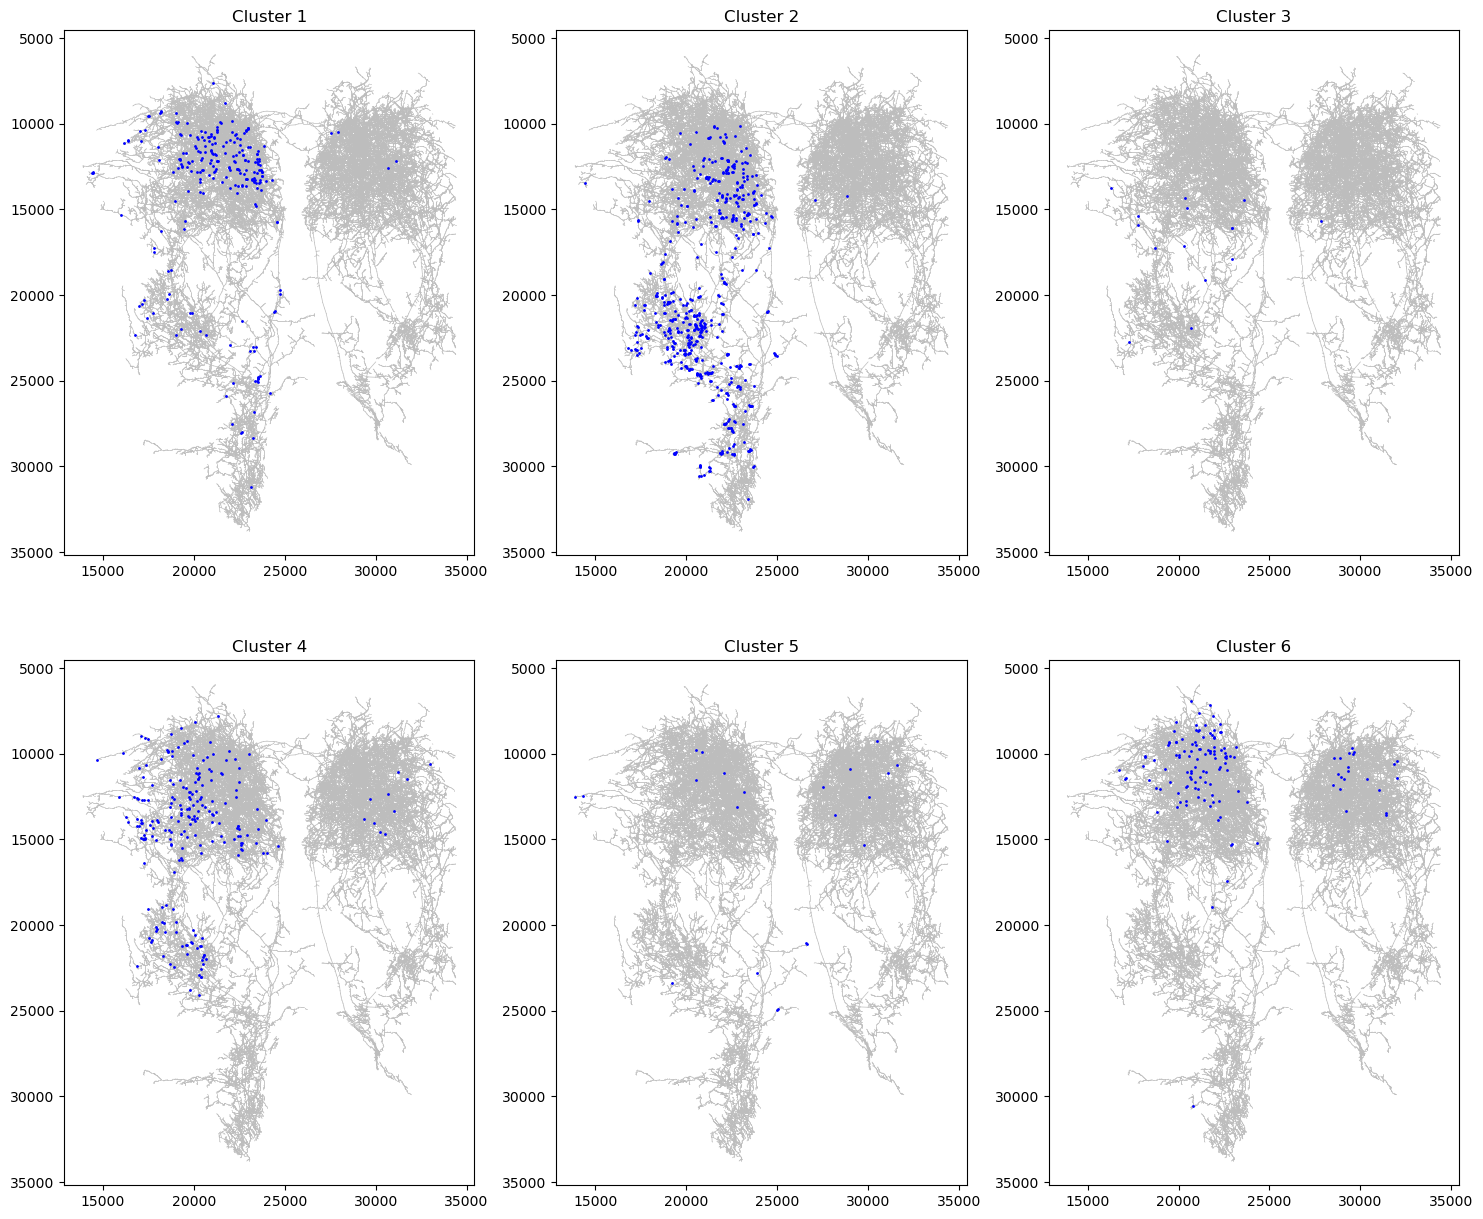

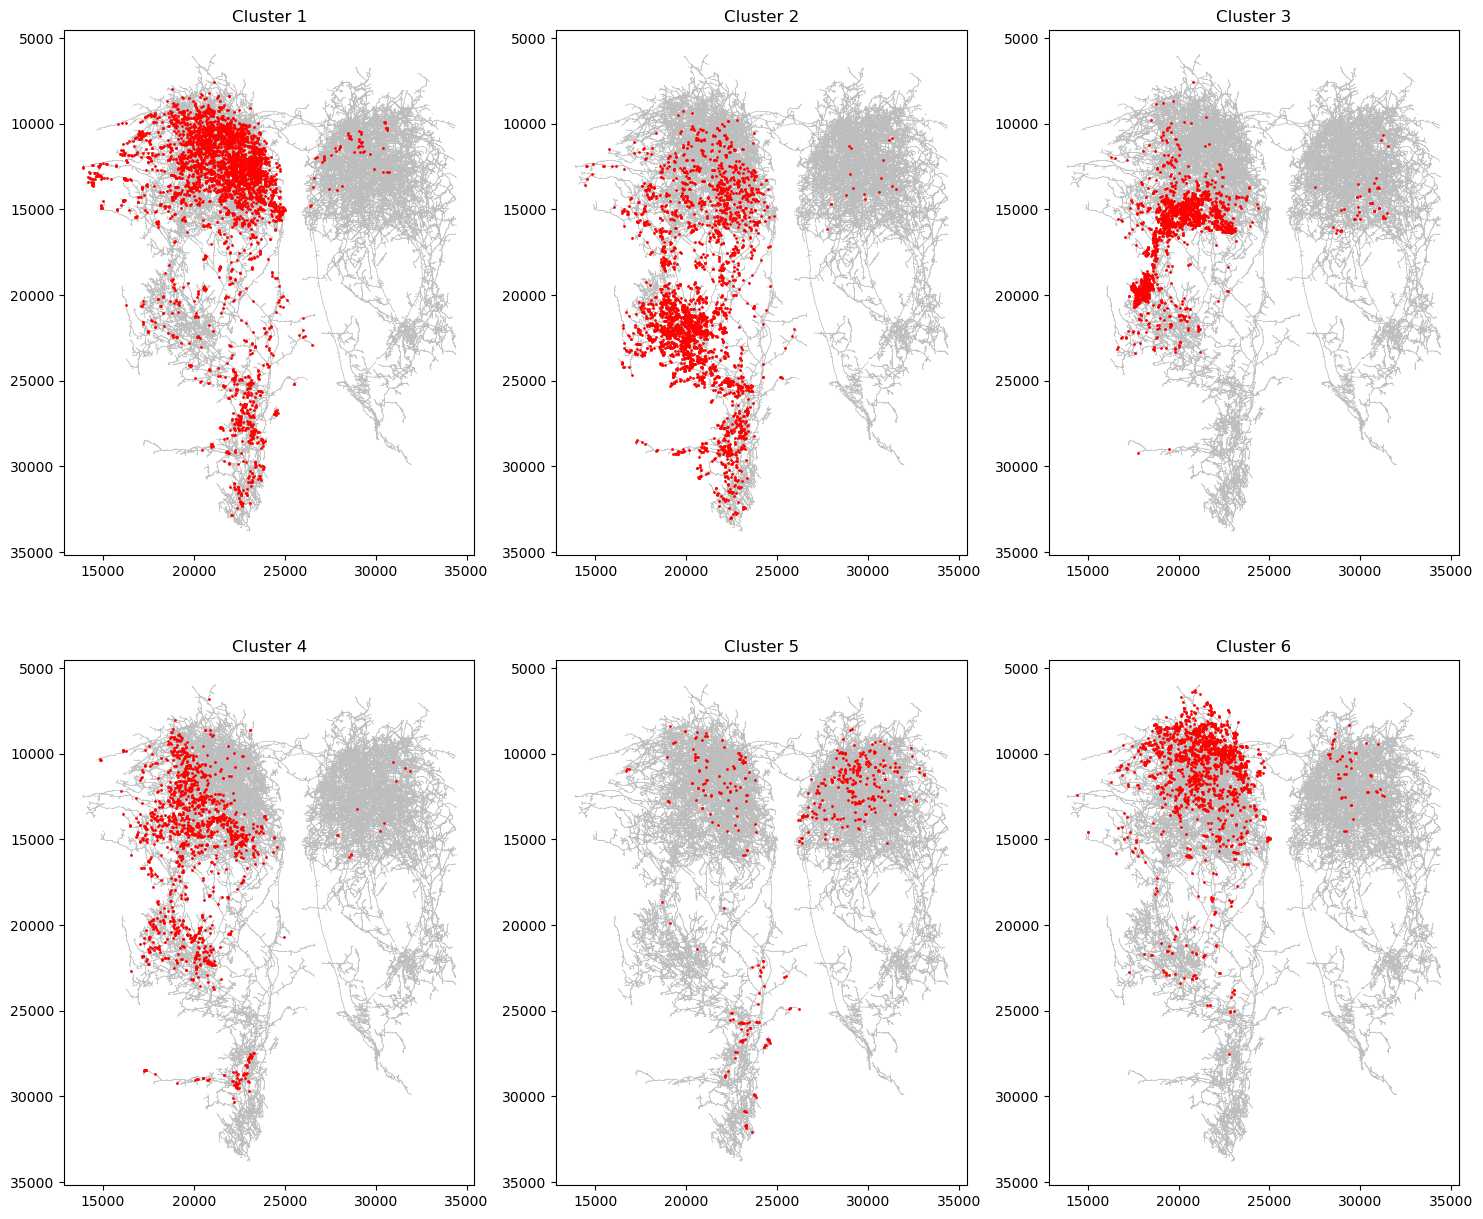

In [29]:
#Create list
cluster_list_input = [1,2,3,4,5,6]

# Run function with input cluster list
cluster_nt(ovi_in, cluster_list_input)
cluster_nt(ovi_ex, cluster_list_input)

## Outputs
Process is repeated using a function, shouldn't take longer than 5 seconds total

If not, close notebook and restart kernel (bokeh gets bugged sometimes)

In [30]:
# Repeat process for outputs
# Pull all neuron data from files
ovi_HB_node_df  = pd.read_csv('/Users/rw2822/Documents/Github/flybrain-clustering/oviIN_combined/preprocessed_outputs-v1.2.1/preprocessed_nodes.csv')
celltype_df = ovi_HB_node_df[['id', '0.0', '0.1', '0.25', '0.5', '0.75', 'celltype']]
ovi_post_syns = pd.read_csv('/Users/rw2822/Documents/Github/flybrain-clustering/ovi_post_syns.csv', index_col=0)
ovi_post_locs = ovi_post_syns.merge(celltype_df, how = 'inner', left_on='bodyId_post', right_on='id')
ovi_nt_info = pd.read_csv('/Users/rw2822/Documents/Github/flybrain-clustering/ovi_output_types.csv')
ovi_nt_info_refined = ovi_nt_info[['type_post', 'neurotransmitter']].copy()

# Create complete dataframe
ovi_l = ovi_post_locs.merge(ovi_nt_info_refined, left_on='type_post', right_on='type_post')
ovi_l = ovi_l.fillna('Unknown')
ovi_in = ovi_l.copy()
ovi_ex = ovi_l.copy()

# create output colormap
colormap = {'GABA': 'blue',
            'GABA (L)': 'blue',
            'SER': 'blue',
            'SER (R)': 'blue',
            'SER (L) DA (R)': 'blue',
            'DA': 'blue',
            'DA (L)': 'blue',
            'DA (R)': 'blue',
            'DA, SER(L)': 'blue'}
    # Add colormap info to dataframe
ovi_l['color'] = ovi_l['neurotransmitter'].map(colormap)
ovi_in['color'] = ovi_in['neurotransmitter'].map(colormap_in)
ovi_ex['color'] = ovi_ex['neurotransmitter'].map(colormap_ex)

# Create funciton for rest
def create_skeleton_outputs(ovi_l):
    
    ovi_red = ovi_l[ovi_l['color']=='red']
    ovi_blue = ovi_l[ovi_l['color']=='blue']
    ovi_green = ovi_l[ovi_l['color']=='green']
    ovi_black = ovi_l[ovi_l['color']=='black']
    ovi_pink = ovi_l[ovi_l['color']=='pink']

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_title('Both oviINs')
    ax.invert_yaxis()  # Flip the y-axis

    for index, row in segments.iterrows():
        ax.plot([row['x_child'], row['x_parent']], [row['z_child'], row['z_parent']], color=row['color_child'], zorder=1)

    ax.scatter(ovi_red['x_post'], ovi_red['z_post'], color='red', s=2, zorder=10)
    ax.scatter(ovi_blue['x_post'], ovi_blue['z_post'], color='blue', s=2, zorder=10)
    ax.scatter(ovi_green['x_post'], ovi_green['z_post'], color='green', s=2, zorder=10)
    ax.scatter(ovi_black['x_post'], ovi_black['z_post'], color='black', s=2, zorder=10)
    ax.scatter(ovi_pink['x_post'], ovi_pink['z_post'], color='pink', s=2, zorder=10)
    
    # Plot the skeleton (2D)
    plt.show()

    return ovi_l

In [ ]:
colormap = {'GLUT': 'red',
                'GLUT (L)': 'red',
                'GLUT (R)': 'red',
            'ACH': 'red', 
            'ACH*': 'red', 
            'ACH left': 'red', 
            'ACH, GLUT': 'red',
            'NE': 'red', 
            'GLUT (R) ACH (L)': 'red', 
            'GLUT (L) ACH (R)': 'red', 
            'GLUT (R) GLUT (L) ACH (R)': 'red',
            'GLUT (L) ACH (L) GLUT (R) ACH (R)': 'red',
            'GABA': 'blue',
            'GABA (L)': 'blue',
            'SER': 'blue',
            'SER (R)': 'blue',
            'SER (L) DA (R)': 'blue',
            'DA': 'blue',
            'DA (L)': 'blue',
            'DA (R)': 'blue',
            'DA, SER(L)': 'blue', 
            'ACH (L) SER (R)': 'green',
            'SER, GLUT': 'green',
            'SER (L) GLUT (L)': 'green',
            'SER (R) ACH (L)': 'green',
            'GLUT (R) DA (L)': 'green',
            'GLUT (R) SER (L) GLUT (L)': 'green',
            'ACH (L) DA (R)': 'green',
            'SER (L) GLUT (L) SER (R) GLUT (R)': 'green',
            'DA (R) ACH (R) GLUT (R)': 'green',
            'DA (R) GLUT (L)': 'green',
            'GLUT (R) SER (L)': 'green',
            'GLUT (L) SER (R)': 'green',
            'GLUT (L & R) SER (L) ACH (L&R)': 'green',
            'GLUT (L) SER (L) GLUT (R) ACH (R) ACH (L)': 'green',
            'GLUT (R) GLUT (L) SER (L)': 'green',
            'SER GLUT (L)': 'green',
            'GABA (L) GLUT (L)': 'green',
            'SER, GLUT': 'green',
            'OCT':'pink',
            'OCT (C)':'pink',
            'Unknown': 'black'}

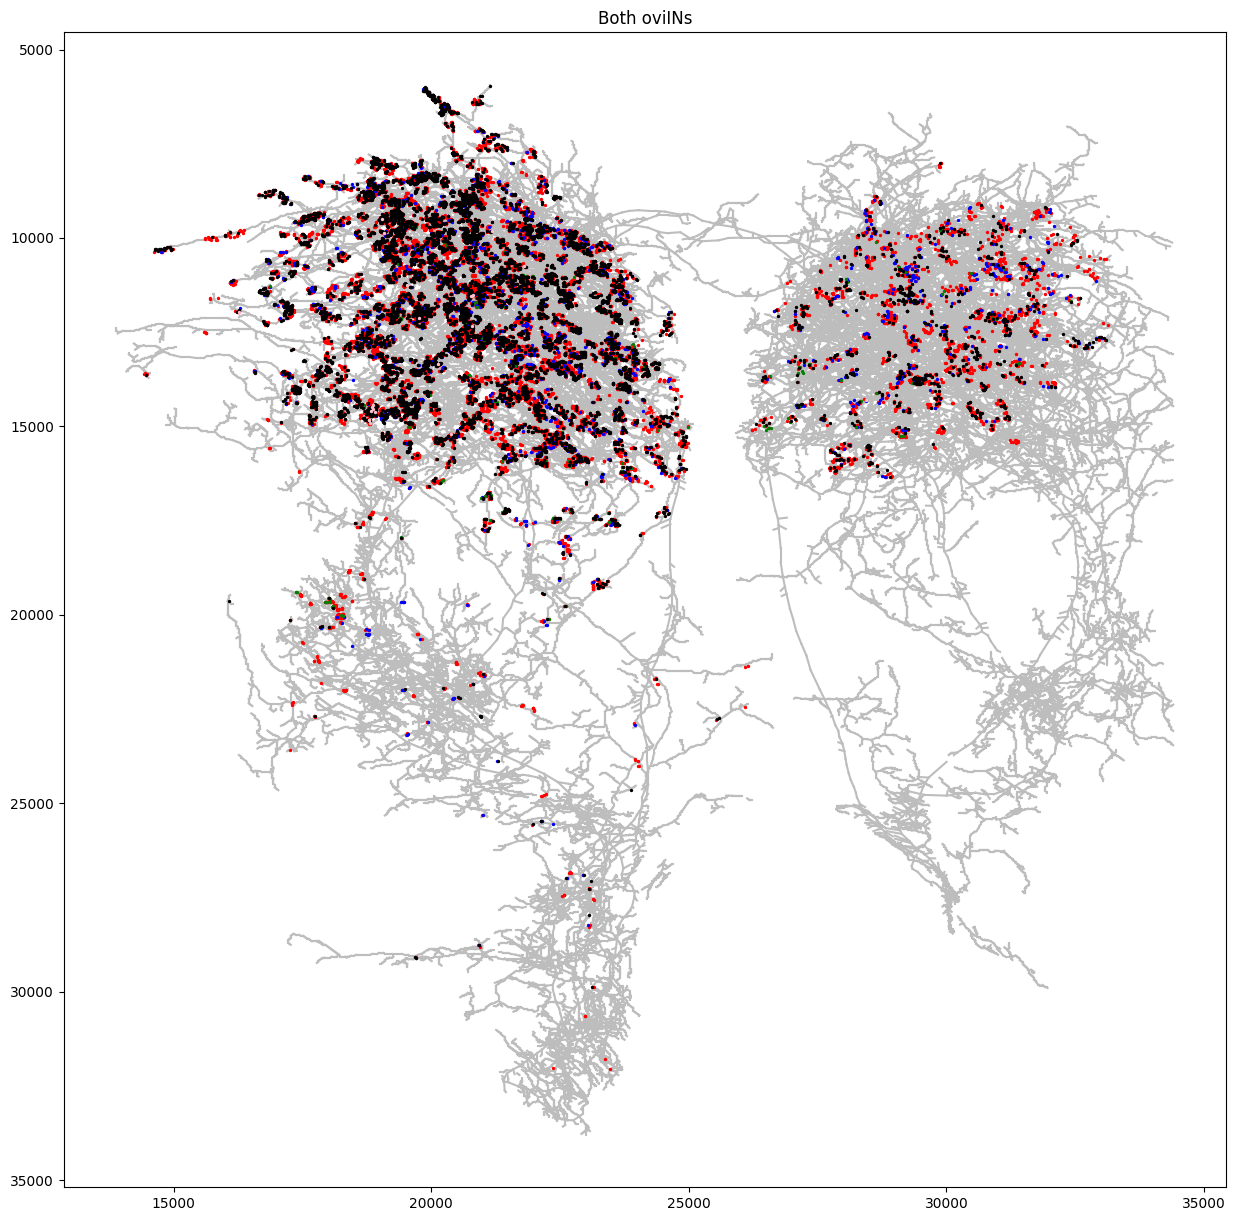

In [42]:
# Should take max 50 seconds to run
create_skeleton_outputs(ovi_l)

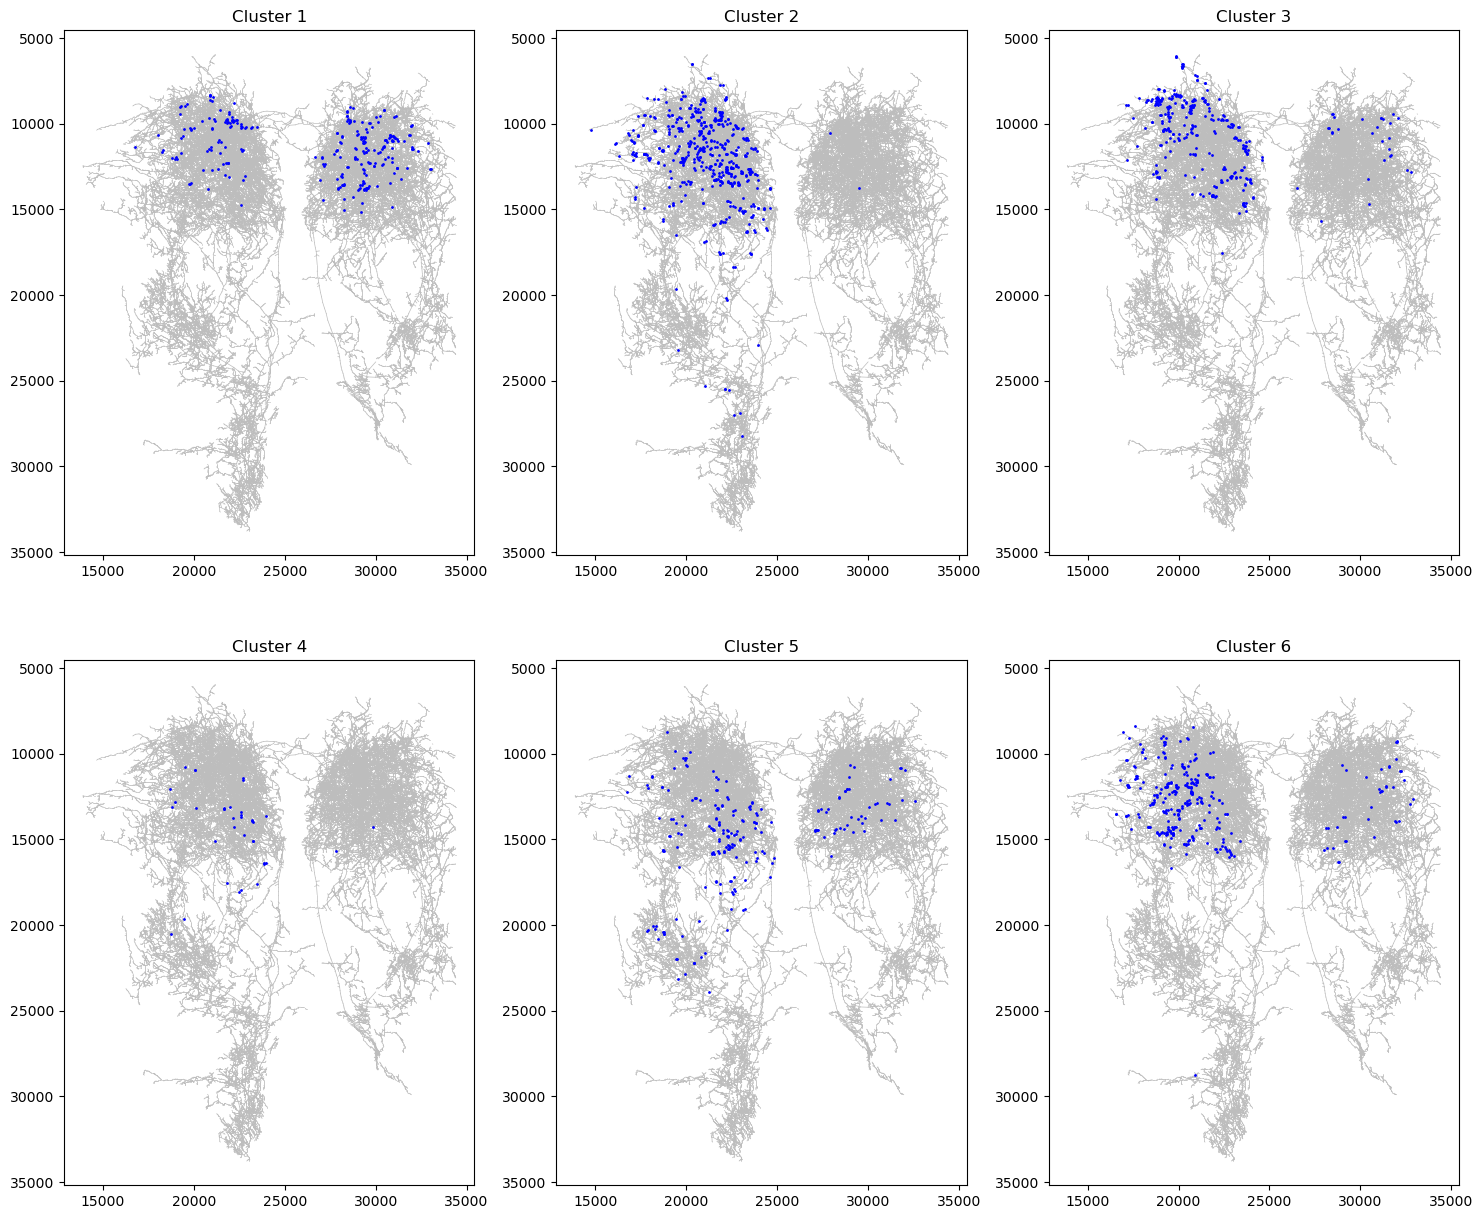

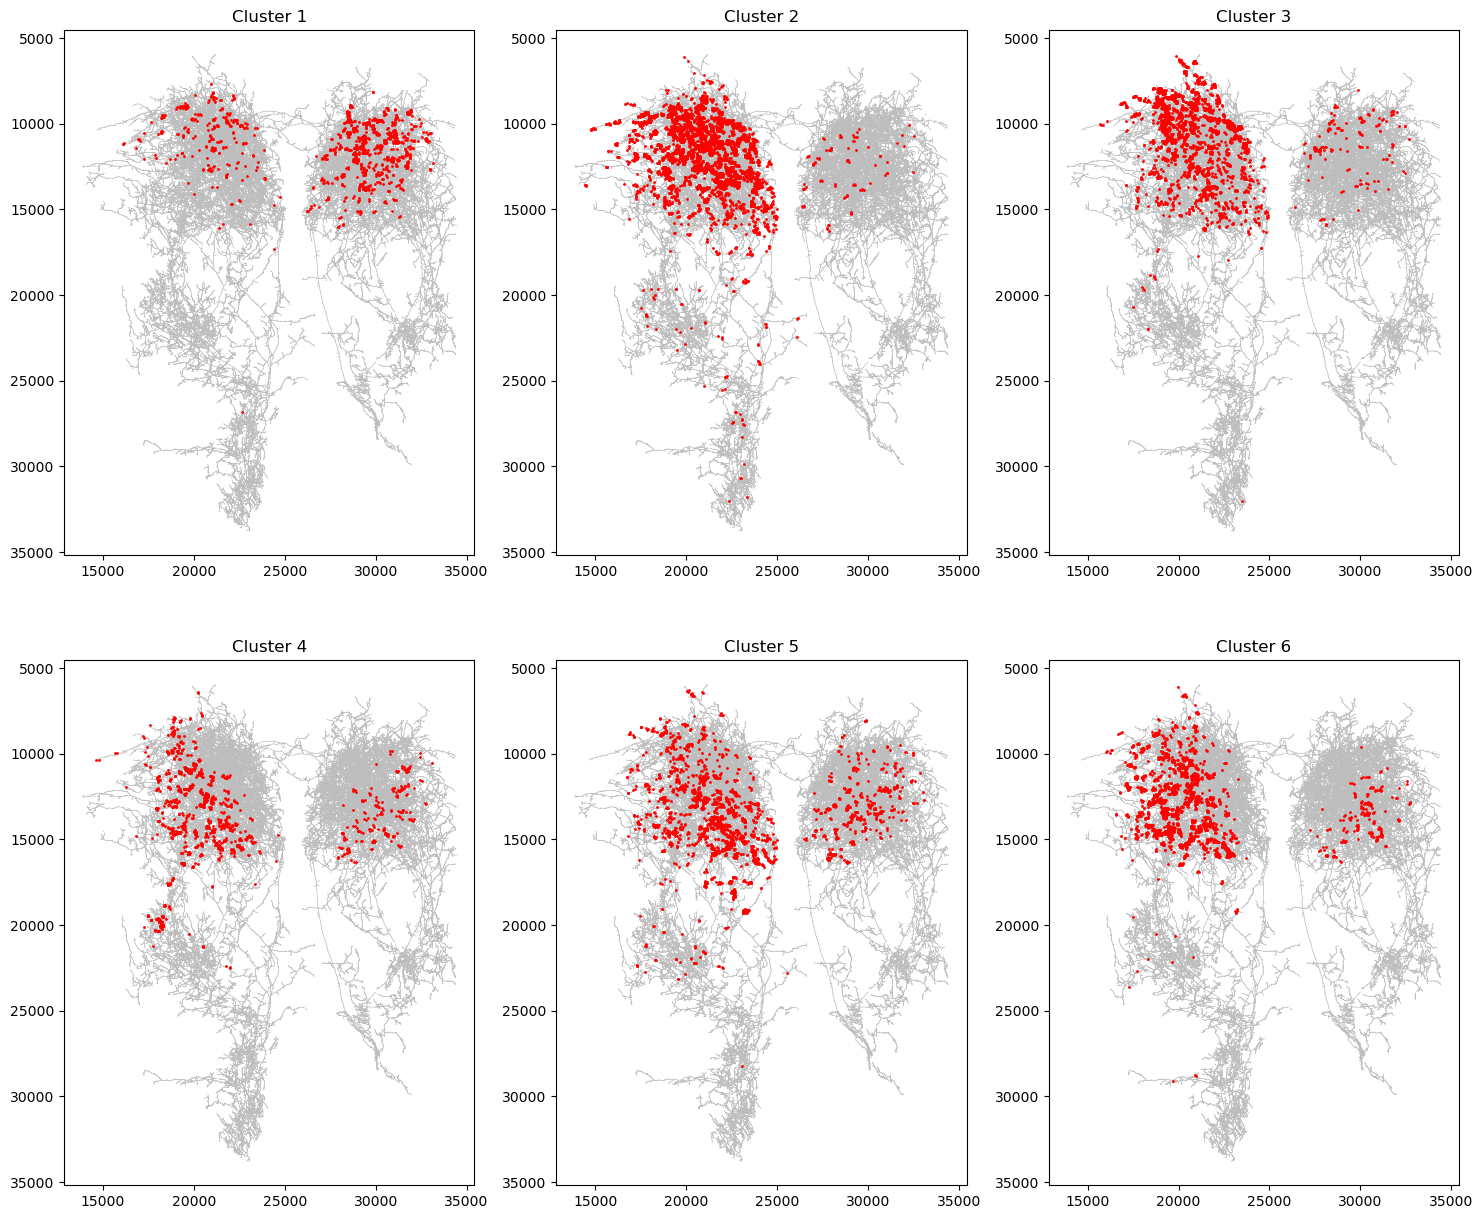

In [31]:
#Create list
cluster_list_output = [1,2,3,4,5,6]

# Run function with input cluster list
cluster_nt(ovi_in, cluster_list_output)
cluster_nt(ovi_ex, cluster_list_output)